<a href="https://colab.research.google.com/github/KodumuruRaja/Regularization-Algorithms/blob/main/All%20Regularization%20Models%20Implementation(Lasso%2C%20Ridge%2C%20ElasticNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets

In [ ]:
data=datasets.load_boston()

In [ ]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['houseprice']=data.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,houseprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
x=df.iloc[:,0:13].values
y=df.iloc[:,13].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
elastic.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

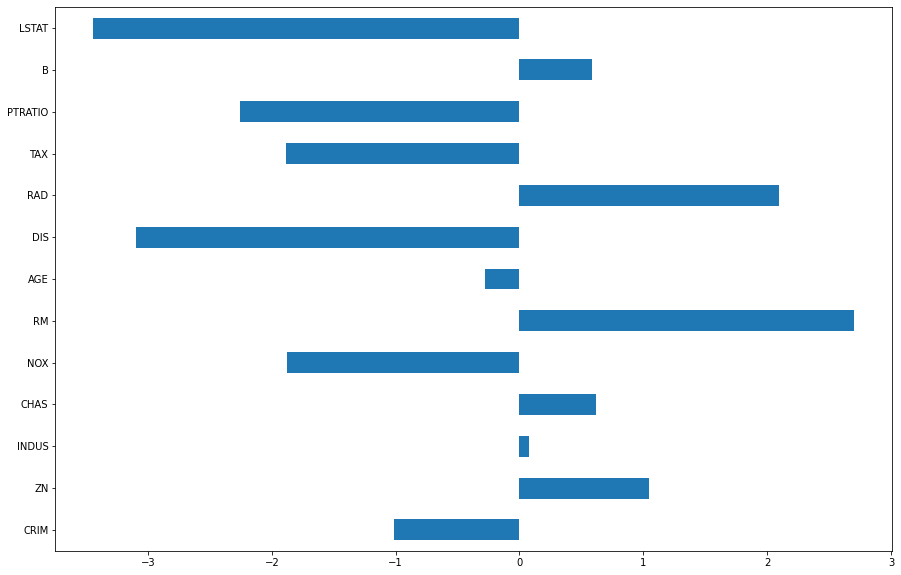

In [ ]:
plt.figure(figsize=(15,10))
coeff=pd.Series(lr.coef_,index=data.feature_names)
coeff.plot(kind='barh')
plt.show()

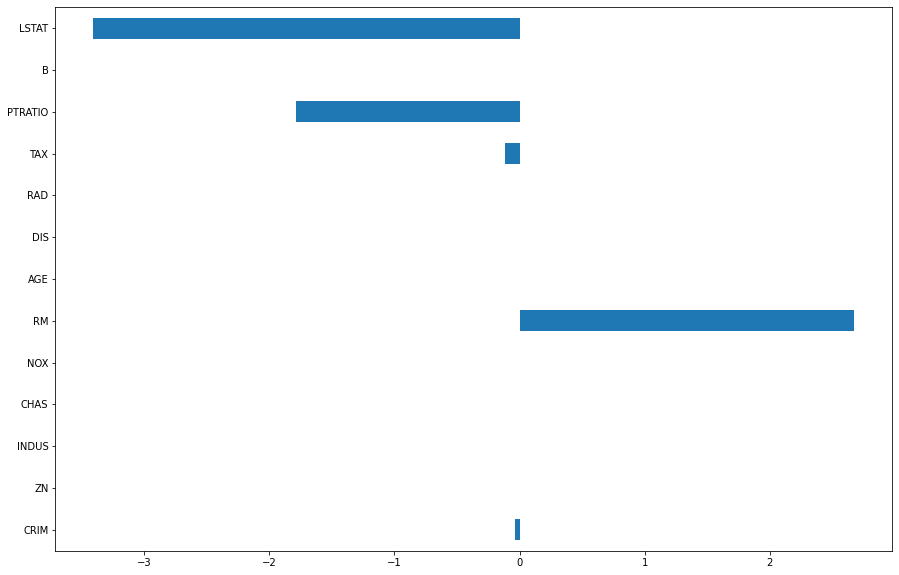

In [ ]:
plt.figure(figsize=(15,10))
coeff=pd.Series(lasso.coef_,index=data.feature_names)
coeff.plot(kind='barh')
plt.show()

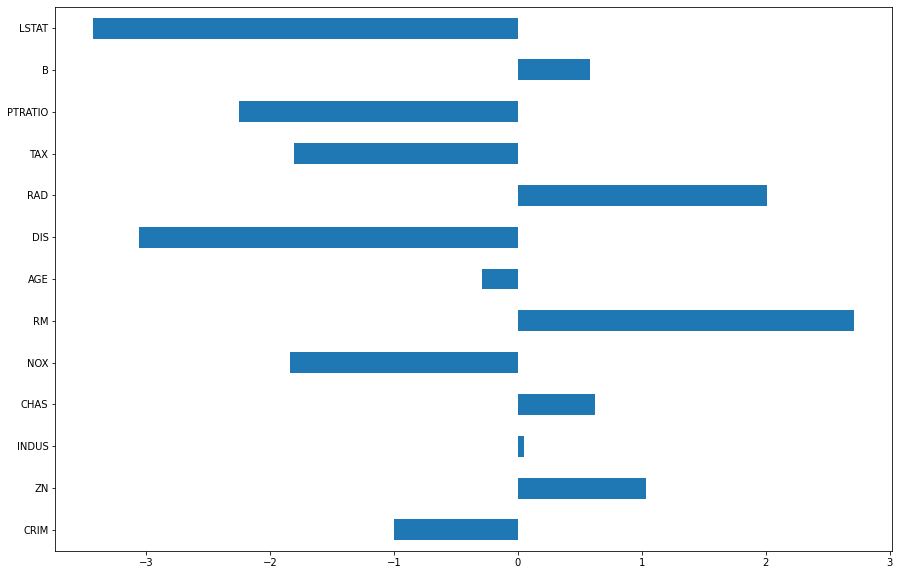

In [ ]:
plt.figure(figsize=(15,10))
coeff=pd.Series(ridge.coef_,index=data.feature_names)
coeff.plot(kind='barh')
plt.show()

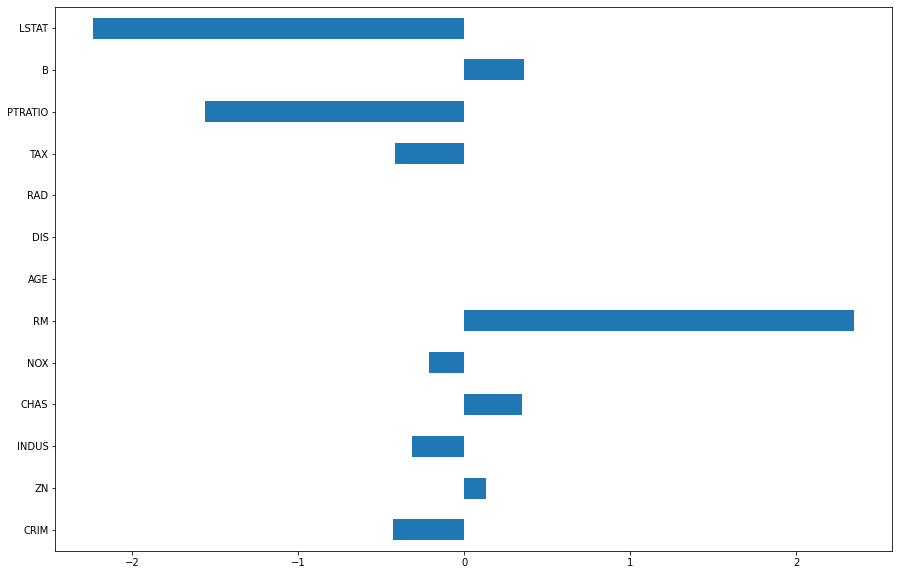

In [ ]:
plt.figure(figsize=(15,10))
coeff=pd.Series(elastic.coef_,index=data.feature_names)
coeff.plot(kind='barh')
plt.show()

In [ ]:
y_pred_lr=lr.predict(x_test)
y_pred_lasso=lasso.predict(x_test)
y_pred_ridge=ridge.predict(x_test)
y_pred_elastic=elastic.predict(x_test)

In [ ]:
print("Simple Linear regression mean square error for test data is")
np.round(metrics.mean_squared_error(y_test,y_pred_lr),2)

Simple Linear regression mean square error for test data is


28.38

In [ ]:
print("Lasso regression mean square error for test data is")
np.round(metrics.mean_squared_error(y_test,y_pred_lasso),2)

Lasso regression mean square error for test data is


34.1

In [ ]:
print("Ridge regression mean square error for test data is")
np.round(metrics.mean_squared_error(y_test,y_pred_ridge),2)

Ridge regression mean square error for test data is


28.43

In [ ]:
print("ElasticNet regression mean square error for test data is")
np.round(metrics.mean_squared_error(y_test,y_pred_elastic),2)

ElasticNet regression mean square error for test data is


35.83

In [ ]:
print("Rsquare value for simple Linear Regression on test data:")
np.round(lr.score(x_test,y_test)*100,2)

Rsquare value for simple Linear Regression on test data:


65.91

In [ ]:
print("Rsquare value for Lasso Regression on test data:")
np.round(lasso.score(x_test,y_test)*100,2)

Rsquare value for Lasso Regression on test data:


59.04

In [ ]:
print("Rsquare value for Ridge Regression on test data:")
np.round(ridge.score(x_test,y_test)*100,2)

Rsquare value for Ridge Regression on test data:


65.85

In [ ]:
print("Rsquare value for ElasticNet Regression on test data:")
np.round(elastic.score(x_test,y_test)*100,2)

Rsquare value for ElasticNet Regression on test data:


56.97

# **Obtain Best Alpha Value**

In [ ]:
#lasso regression
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-22.936783818944765


In [ ]:
#ridge regression
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-22.755409635801648


In [ ]:
#elasticnet regression
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train,y_train)
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

{'alpha': 0.01}
-22.90091501642686
